In [1]:
import pandas as pd
import numpy as np

In [2]:
logs = [pd.read_csv(file, sep='\t').sort_values('function') for file in ['models/March/30/17_24/output/log.tsv', 'models/March/30/17_58/output/log.tsv']]

In [3]:
logs[0]

,function,AUC posP posR,AUC negP negR,AUC tpr fpr
23,GO-0001085,0.003062,0.356589,0.328273
38,GO-0001102,0.000753,0.412010,0.424087
24,GO-0002020,0.004517,0.368688,0.333714
94,GO-0002039,0.002458,0.387985,0.352845
8,GO-0003674,0.118186,-0.200172,0.309180
22,GO-0005102,0.012459,0.052533,0.375529
87,GO-0005126,0.001021,0.277225,0.461755
88,GO-0005158,0.000652,0.473118,0.429178
89,GO-0005159,0.000595,0.471433,0.430972
90,GO-0005165,0.000153,0.482918,0.516939


In [4]:
logshapes = [len(l.index) for l in logs]
logshapes, np.all(logs[1].function==logs[0].function)

([113, 113], True)

In [5]:
posAUCPR = np.zeros(shape=logshapes)
negAUCPR = np.zeros(shape=logshapes)
AUCROC = np.zeros(shape=logshapes)

In [7]:
for i, l1 in logs[0].iterrows():
    for j, l2 in logs[1].iterrows():
        posAUCPR[i][j] = l1['AUC posP posR']-l2['AUC posP posR']
        negAUCPR[i][j] = l1['AUC negP negR']-l2['AUC negP negR']
        AUCROC[i][j] =   l1['AUC tpr fpr']-l2['AUC tpr fpr']

In [9]:
import pylab as pl

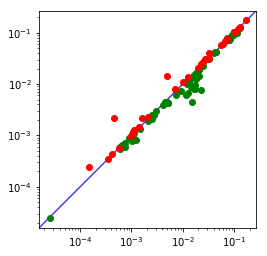

(69, 35)

In [45]:
pl.figure()
m = logs[0]['AUC posP posR']>logs[1]['AUC posP posR']
am = logs[0]['AUC posP posR']<logs[1]['AUC posP posR']
pl.loglog(logs[0]['AUC posP posR'][m], logs[1]['AUC posP posR'][m], 'go')
pl.loglog(logs[0]['AUC posP posR'][am], logs[1]['AUC posP posR'][am], 'ro')
#pl.loglog(logs[0]['AUC negP negR'], logs[1]['AUC negP negR'], 'ro')
#pl.plot(logs[0]['AUC tpr fpr'], logs[1]['AUC tpr fpr'], 'bo')

ax = pl.gca()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'b-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
pl.show()
pl.close()
np.sum(m), np.sum(am)

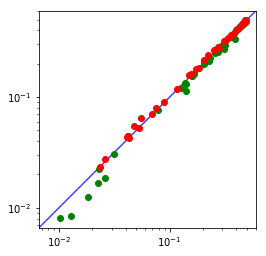

(61, 52)

In [46]:
pl.figure()
m = logs[0]['AUC negP negR']>logs[1]['AUC negP negR']
am = logs[0]['AUC negP negR']<logs[1]['AUC negP negR']
pl.loglog(logs[0]['AUC negP negR'][m], logs[1]['AUC negP negR'][m], 'go')
pl.loglog(logs[0]['AUC negP negR'][am], logs[1]['AUC negP negR'][am], 'ro')
#pl.loglog(logs[0]['AUC negP negR'], logs[1]['AUC negP negR'], 'ro')
#pl.plot(logs[0]['AUC tpr fpr'], logs[1]['AUC tpr fpr'], 'bo')

ax = pl.gca()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'b-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
pl.show()
pl.close()
np.sum(m), np.sum(am)

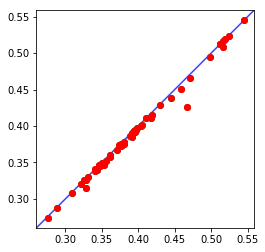

(58, 54)

In [48]:
pl.figure()
m = logs[0]['AUC tpr fpr']>logs[1]['AUC tpr fpr']
am = logs[0]['AUC tpr fpr']<logs[1]['AUC tpr fpr']
pl.plot(logs[0]['AUC tpr fpr'][m], logs[1]['AUC tpr fpr'][m], 'go')
pl.plot(logs[0]['AUC tpr fpr'][m], logs[1]['AUC tpr fpr'][m], 'ro')

ax = pl.gca()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'b-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
pl.show()
pl.close()
np.sum(m), np.sum(am)